# Bibliotecas

In [1]:
#Bibliotecas
from shapely import LineString, Point, Polygon
import shapely as sh
import matplotlib.pyplot as plt
from random import uniform
import numpy as np

# Funciones

In [2]:
#Funciones

def distancia_de_un_punto_a_otros(zz,punto):
    """
    zz    -> Arreglo numpy de dimensiones(N,2)
    punto -> coordenadas de un punto (x,y)
    """
    
    z= np.array(zz,copy=True)
    #Ahora encontraremos la distancia minima
    distancia_minima = 1000

    for i in range(0,len(zz)):
        
            #Calculamos la distancia entre el punto i y el punto j
            distancia =   Point(z[i,0],z[i,1]).distance(Point(punto[0],punto[1]))
            
            #Si la distancia calculada es menor a la distancia minima entonces la actualizamos y si 
            #es la primera comparacion esa es la distancia minima
            if distancia_minima>distancia:
                distancia_minima = distancia

    return distancia_minima

#Funciones
def distancia_de_un_punto_a_otros_identificador(zz,punto):
    """
    zz    -> Arreglo numpy de dimensiones(N,2)
    punto -> coordenadas de un punto (x,y)
    
    Se regresan dos resultados
    distancia_minima -> Float64
    indice -> Indice de cual fue el elemento del arreglo zz
              con el que se encontro la distancia minima
    """
    
    z= np.array(zz,copy=True)
    #Ahora encontraremos la distancia minima
    distancia_minima = 1000
    indice = 0
    for i in range(0,len(zz)):
        
            #Calculamos la distancia entre el punto i y el punto j
            distancia =   Point(z[i,0],z[i,1]).distance(Point(punto[0],punto[1]))
            
            #Si la distancia calculada es menor a la distancia minima entonces la actualizamos y si 
            #es la primera comparacion esa es la distancia minima
            if distancia_minima>distancia:
                distancia_minima = distancia
                indice = i

    return distancia_minima, indice


def distancia_minima_todos_puntos(zz,indice_max):
    z= np.array(zz,copy=True)
    #Ahora encontraremos la distancia minima
    distancia_minima = 1000

    for i in range(0,indice_max):
        for j in range(0,indice_max):
            #No se compara la distancia entre puntos iguales
            if i==j:
                break
            #Calculamos la distancia entre el punto i y el punto j
            #distancia = ((z[i,0] - z[j,0])**2 + (z[i,1] - z[j,1])**2)**0.5
            distancia =   Point(z[i,0],z[i,1]).distance(Point(z[j,0],z[j,1]))
            #Si la distancia calculada es menor a la distancia minima entonces la actualizamos y si 
            #es la primera comparacion esa es la distancia minima
            if distancia_minima>distancia and (distancia != 0):
                distancia_minima = distancia

    return distancia_minima

def identificador_cero(zz):
    z= np.array(zz,copy=True)
    for i in range(0,len(z)):
        if (z[i,0] == 0) and (z[i,1]==0):
            break
    
    return i

#Esta funcion genera las rectas para graficar no para saber que valores tiene esa recta
def f(x,a,b):
    y=0
    xx = np.array(x,copy=True)
    y = a*xx + b
    return y

#Esta funcion tiene como objetivo calcular las pendientes de multiples rectas 
#en las que cada una pasa sobre dos puntos
def calcular_las_semirectas(arreglo):
    """
    El arreglo que se recibe debe de tener el siguiente formato 
    arreglo :   Dimensiones ->  (ranglones  ,  filas)
                                (N_renglones,2_filas)
                Valores_recibidos ->  [[coord_x, coord_y), (coord_x1,coord_y1),...]
    Se regresará un arreglo con el siguiente formato
    m       :   Dimensiones ->  (ranglones         ,filas)
                                (cantidad_de_Rectas,    6)
                Valores_en_cada_renglon ->   (pendiente, ordenada_origen,
                                                limitex_inferior, limitex_superior
                                                limitey_inferior, limitey_superior)
                
    """
    arreglo_u = np.array(arreglo, copy=True)
    
    #La cantidad de rectas que se van a calcular depende de la cantidad de puntos
    if len(arreglo_u) == 2:
        cantidad_de_rectas = 1
    else:
        cantidad_de_rectas = len(arreglo_u) - 1

        
    rectas = np.zeros((cantidad_de_rectas,6),np.float64)
    
    #Se calcularan las normales 
    for i in range(0,len(rectas)):
        #print(i,"a",i+2)
        #Hacemos un filtro para comprobar que los puntos 
        #no puedan estar uno sobre otro y no obtendremos un error matematico
        #o un valor gigantesco
        
        #rectas[,0] = np.nan significa que hay infinitos valores y
        #rectas[,0] = np.inf es que hay infinitos valores de x      
        #Caso en el que hay infinitos valores de y para una funcion
        if abs(arreglo_u[i,0] - arreglo_u[i+1,0])<0.000001:
            rectas[i,:] = (np.nan,np.inf,arreglo[i,0],arreglo[i+1,0],arreglo[i,1],arreglo[i+1,1])
            

            continue
        #Caso en el que hay infinitos valores x para una funcion
        elif abs(arreglo_u[i,1] - arreglo_u[i+1,1])<0.000001:
            rectas[i,:] = (np.inf,np.nan,arreglo[i,0],arreglo[i+1,0],arreglo[i,1],arreglo[i+1,1])
            continue
            
        #Caso regular
        else:
            p = np.polyfit(
                        arreglo_u[i:i+2,0],
                        arreglo_u[i:i+2,1],
                        1)
            rectas[i,:] = (p[0],p[1],arreglo[i,0],arreglo[i+1,0],arreglo[i,1],arreglo[i+1,1])
        
    return rectas

def vector_director(m1,b1):
    
    #Calculamos dos puntos de cada recta
    x1=1
    x2=2
    P1 = [x1, f(x1,m1,b1)]
    P2 = [x2, f(x2,m1,b1)]
    vector_dire = [P2[0] - P1[0], P2[1] - P1[1]]
    
    #Normalizamos el vector director
    magnitude = (vector_dire[0]**2 + vector_dire[1]**2)**0.5
     
    
    vector_dire = [vector_dire[0]/magnitude, vector_dire[1]/magnitude]
    if np.isinf(m1):
        vector_dire = [1,0]
    elif np.isnan(m1):
        vector_dire = [0,1]
        
    return np.array(vector_dire)



# Figura

Lo que buscamos aquí es ordenar los puntos de la siguiente forma:

    - Dar un arreglo
    - Generar un arreglo vacio de las mismas dimensiones
    - Elegir un elemento de ese arreglo
    - Guardar ese elemento en la primera parte del arreglo en ceros
    - Calcular cual es el siguiente punto más cercano a ese
    - Guardar ese punto en el siguiente indice del arreglo en ceros
    - Eliminar el punto del arreglo original

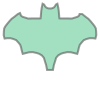

In [3]:
Puntos_sin_ordenar = [(0.398800723842904, -7.95365259525281), (3.68659254979499, -5.78561595640035), (0.517923616087545, -7.31038897713175), (0.684695665230042, -6.78624825125533), (0.827643135923611, -6.30975668227677), (1.11353807731075, -5.97621258399178), (1.49473133249360, -5.76179137795142), (1.87592458767645, -5.64266848570678), (2.35241615665501, -5.54737017191107), (2.85273230408251, -5.57119475036000), (3.23392555926536, -5.66649306415571), (3.80571544203963, -5.38059812276857), (3.90101375583535, -4.95175571068787), (4.02013664807999, -4.57056245550502), (4.28220701101820, -4.23701835722002), (4.56810195240534, -3.92729883738396), (4.90164605069033, -3.78435136669039), (5.33048846277104, -3.66522847444575), (5.78315545330067, -3.66522847444575), (6.14052413003459, -3.71287763134360), (6.25964702227924, -3.26021064081397), (6.23582244383031, -2.68842075803969), (6.18817328693245, -2.33105208130577), (6.00000000000000, -2.00000000000000), (5.71168171795389, -1.64013930628686), (5.47343593346461, -1.35424436489972), (5.18754099207747, -1.04452484506365), (4.83017231534355, -0.782454482125443), (4.35368074636498, -0.401261226942592), (4.05994439664004, -0.188418145184806), (3.99831611752934, -0.393845742220471), (3.94695921827042, -0.578730579552571), (3.81343128019724, -0.712258517625753), (3.66963196227227, -0.784158176588236), (3.42311884582947, -0.866329215402503), (3.22796262864559, -0.917686114661419), (3.00000000000000, -1.00000000000000), (2.76575053531534, -1.01012853332747), (2.53978017857610, -0.999857153475685), (2.28299568228152, -0.999857153475685), (2.00000000000000, -1.00000000000000), (1.70779841058166, -0.999857153475685), (1.46128529413886, -0.999857153475685), (1.27640045680676, -0.979314393772119), (1.24558631725141, -0.763615416884670), (1.23531493739962, -0.558187819849004), (1.20450079784427, -0.280860563850855), (1.18395803814071, 0.00000000000000), (1.15314389858536, 0.201894289182960), (1.13260113888179, 0.386779126515059), (1.09151561947466, 0.592206723550725), (1.04015872021574, 0.818177080289957), (1.00000000000000, 1.00000000000000), (0.845002503031856, 0.920890878807790), (0.742288704514023, 0.797634320586390), (0.660117665699756, 0.633292242957858), (0.516318347774790, 0.489492925032892), (0.351976270146257, 0.407321886218625), (0.177362812665940, 0.355964986959709), (-0.398800723842905, -7.95365259525281), (-3.68659254979499, -5.78561595640035), (-0.517923616087546, -7.31038897713175), (-0.684695665230043, -6.78624825125533), (-0.827643135923612, -6.30975668227677), (-1.11353807731075, -5.97621258399178), (-1.49473133249360, -5.76179137795142), (-1.87592458767645, -5.64266848570678), (-2.35241615665502, -5.54737017191107), (-2.85273230408251, -5.57119475036000), (-3.23392555926536, -5.66649306415571), (-3.80571544203963, -5.38059812276857), (-3.90101375583535, -4.95175571068787), (-4.02013664807999, -4.57056245550502), (-4.28220701101820, -4.23701835722002), (-4.56810195240534, -3.92729883738396), (-4.90164605069033, -3.78435136669039), (-5.33048846277104, -3.66522847444575), (-5.78315545330067, -3.66522847444575), (-6.14052413003460, -3.71287763134360), (-6.25964702227924, -3.26021064081397), (-6.23582244383031, -2.68842075803969), (-6.18817328693245, -2.33105208130577), (-6.00000000000000, -2.00000000000000), (-5.71168171795389, -1.64013930628685), (-5.47343593346461, -1.35424436489972), (-5.18754099207747, -1.04452484506365), (-4.83017231534355, -0.782454482125442), (-4.35368074636498, -0.401261226942592), (-4.05994439664004, -0.258418145184805), (-3.99831611752934, -0.393845742220471), (-3.94695921827042, -0.578730579552570), (-3.81343128019724, -0.712258517625753), (-3.66963196227227, -0.784158176588236), (-3.42311884582947, -0.866329215402502), (-3.22796262864559, -0.917686114661419), (-3.00000000000000, -1.00000000000000), (-2.76575053531534, -1.01012853332747), (-2.53978017857610, -0.999857153475685), (-2.28299568228152, -0.999857153475685), (-2.00000000000000, -1.00000000000000), (-1.70779841058166, -0.999857153475685), (-1.46128529413886, -0.999857153475685), (-1.27640045680676, -0.979314393772119), (-1.24558631725141, -0.763615416884670), (-1.23531493739962, -0.558187819849004), (-1.20450079784427, -0.280860563850855), (-1.18395803814071, 1.44993042173379E-16), (-1.15314389858536, 0.201894289182960), (-1.13260113888179, 0.386779126515059), (-1.09151561947466, 0.592206723550725), (-1.04015872021574, 0.818177080289957), (-1.00000000000000, 1.00000000000000), (-0.845002503031856, 0.920890878807790), (-0.742288704514023, 0.797634320586391), (-0.660117665699756, 0.633292242957858), (-0.516318347774790, 0.489492925032892), (-0.351976270146256, 0.407321886218625), (-0.177362812665940, 0.355964986959709)]
 
Puntos_sin_ordenar = np.array(Puntos_sin_ordenar)
Puntos_ordenados = np.zeros((len(Puntos_sin_ordenar),len(Puntos_sin_ordenar[0,:])), np.float64)

#Elemento inicial 
ele = 0
Puntos_ordenados[0,:] = Puntos_sin_ordenar[ele,:]

#Aqui se guardará el indice de con que otro punto se consiguio la distancia minima
identificador = 0
#distancia_minima
for i in range(0,len(Puntos_sin_ordenar)-1):

        distancia_minima,identificador = distancia_de_un_punto_a_otros_identificador(Puntos_sin_ordenar,Puntos_ordenados[i,:])
        
        Puntos_ordenados[i+1,:] = Puntos_sin_ordenar[identificador,:]

        Puntos_sin_ordenar = np.delete(Puntos_sin_ordenar,(identificador),axis=0)

poly = Polygon(Puntos_ordenados)
Figura = Puntos_ordenados
poly

# Estructuras de datos

In [4]:
#Numero de puntos iniciales
N = len(Figura)

#Numero de contornos
cant_de_contornos = 1

#Requerimos un aproximado de los puntos totales que queremos en la figura
repeticion = 10
N_aprox = N + N*repeticion


In [5]:
contornos_tipo = np.dtype([
        ('pt_f_c',np.float64,(N_aprox,2)),
        ('Color','S15',(N_aprox,)),
        ('Contorno',np.int64)
])

"""
Así genero un arreglo con este tipo de estructura de datos
"""
#contornos = np.zeros((cant_de_contornos),dtype=contornos_tipo)
#contornos[0]['Color'][0] = 's'

'\nAsí genero un arreglo con este tipo de estructura de datos\n'

# Programa general

In [6]:
#Aquí guardaremos la coordenada (x,y) del punto aleatorio generado
pt_ale = [0,0]

#Arreglo en donde estaran todos estos puntos con sus caracteristicas
#Puntos generales
pts_g = np.zeros((cant_de_contornos),dtype=contornos_tipo)

#Como acceder a un punto de la estructura de datos
#pts_g[0]['pt_f_c'][0,:]

#Arreglo para animar
pt_f_c_x_animation = np.zeros((N_aprox,N_aprox),np.float64)
pt_f_c_y_animation = np.zeros((N_aprox,N_aprox),np.float64)

#Variable para la distancia minima entre puntos
distancia_minima = 1000

#Guardamos los puntos de la figura en el arreglo
pts_g[0]['pt_f_c'][:len(Figura),:] = Figura[:,:]

#Calcularemos las pendientes de todo
rectas = calcular_las_semirectas(pts_g[0]['pt_f_c'][:N])

#Ahora que ya calculamos las rectas para todos los puntos
#toca encontrar la recta normal a cada una de ellas
rectas_normales = np.array(rectas,copy=True)
for i in range(0,len(rectas)):
    #rectas[,0] = np.nan significa que hay infinitos valores y
    #Rectas[,0] = np.inf es que hay infinitos valores de x    
    
    #Condicion 
    #Si una recta tiene inf valores de Y, entonces la normal
    #tiene inf valores de X para una sola Y
    if np.isnan(rectas[i,0])==True:
        rectas_normales[i,0] = np.inf
        rectas_normales[i,1] = np.nan

    elif np.isinf(rectas[i,0])==True:
        rectas_normales[i,0] = np.nan
        rectas_normales[i,1] = np.inf

    else:
        rectas_normales[i,0] = -1*(1/rectas[i,0])


#Ahora pasara por el punto deseado en teoria
nueva_b = np.zeros((len(rectas),1),np.float64)
nueva_b_derechos = np.zeros((len(rectas),1),np.float64)

#y Ahora calculamos los vectores normales de cada recta normal
#Aqui guardamos los vectores normales
vec_normal = np.zeros((len(rectas),2),np.float64)

for i in range(0,len(rectas)):
    #CALCULAMOS nueva B para que las rectas pasen por los puntos izquierdos
    nueva_b[i] = (rectas[i,3] - rectas_normales[i,0]*rectas[i,2]) 
    
    #Calculamos nuevos vectores normales promedio
    vec_normal[i,:] = vector_director(rectas_normales[i,0],rectas_normales[i,1])

    


#Calculamos la distancia minima entre todos los puntos
distancia_minima = distancia_minima_todos_puntos(pts_g[0]['pt_f_c'][:N,:],N) 

#Definimos los radios interior y exterior
r_interior = distancia_minima*0.8
r_exterior = 10*r_interior

#Nos permite saber que tanto mover indices segun puntos aleatorios generados
cant_pt_cumplidos =0

#Contador de nuevos puntos
i=int(0)

#Contador para saber si ya fueron muchos intentos
intentos_limites = 100
contador_intentos = 0

#Contador de nuevos calculos completos
cont_completos=1


#Este for generara puntos hasta llegar a la iteracion que
#buscamos
while i<(N_aprox-N):
    #print(i)
    
    #Esta parte identificara si hay todavia elementos iguales a cero y permitira
    #calcular nuevos elementos
    if i>identificador_cero(pts_g[0]['pt_f_c']):
        i = identificador_cero(pts_g[0]['pt_f_c']) - 5*cont_completos
        if i<N or cont_completos==8:
            i = 0
        print(cont_completos)
        cont_completos +=1
    if cont_completos>20:
        break
    while True:
            #Se genera un punto aleatorio alrededor del punto que
            #que buscamos en una cuadratura
            pt_ale[0] = (r_exterior*uniform(-1,1) + pts_g[0]['pt_f_c'][i,0])
            pt_ale[1] = (r_exterior*uniform(-1,1) + pts_g[0]['pt_f_c'][i,1])
            
            #Calculamos la distancia de este punto con los otros
            distancia_minima_ale_otros =  distancia_de_un_punto_a_otros(pts_g[0]['pt_f_c'][:N+cant_pt_cumplidos,:],pt_ale)
           # print("distancia_minima_ale_otros:", distancia_minima_ale_otros)
            #Si el punto esta entre las circunferencias que buscamos
            #que este lo mantenemos
            if (
                #Condicion si esta fuera del radio interior
            (((pt_ale[0] - pts_g[0]['pt_f_c'][i,0])**2+(pt_ale[1]- pts_g[0]['pt_f_c'][i,1])**2) > r_interior**2)
                #Condicion si esta dentro del radio exterior
                and (((pt_ale[0] - pts_g[0]['pt_f_c'][i,0])**2+(pt_ale[1]- pts_g[0]['pt_f_c'][i,1])**2) < r_exterior**2)
                
                #Condicion si el punto esta dentro de la geometria deseada en Figura        
                and (sh.contains(poly,Point(pt_ale[0],pt_ale[1])))==True
                
                #Si la distancia minima es de pt_ale con los otros es mayor entra
                and distancia_minima_ale_otros>distancia_minima
            ):
                
                #Si cumple con todas esas condiciones guardamos el punto
                pts_g[0]['pt_f_c'][N  +cant_pt_cumplidos,0] = pt_ale[0]
                pts_g[0]['pt_f_c'][N  +cant_pt_cumplidos,1] = pt_ale[1]
                
                pt_f_c_x_animation[:,cant_pt_cumplidos] = pts_g[0]['pt_f_c'][:,0]
                pt_f_c_y_animation[:,cant_pt_cumplidos] = pts_g[0]['pt_f_c'][:,1]
    
                cant_pt_cumplidos += 1
                
                #Reiniciamos los intentos para el nuevo punto generado
                contador_intentos=0
                i+=1
                break
            else:
            #Si no cumple con todas las condiciones repetimos el proceso
            
                #Aumentamos el contador de intentos
                if contador_intentos>intentos_limites:
                    #Aumentamos el contador en uno para la siguiente ocasion
                    i+=1
                    break
                contador_intentos +=1
                continue              


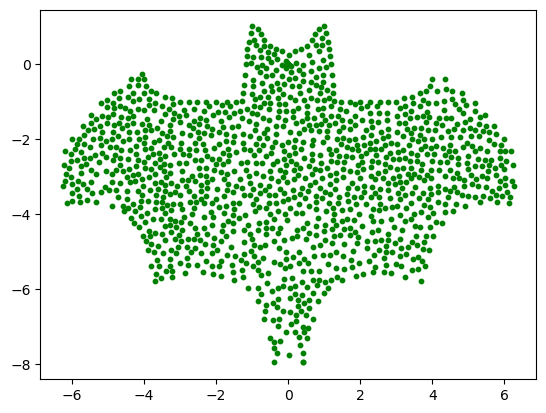

In [7]:
plt.scatter(pts_g[0]['pt_f_c'][:,0], pts_g[0]['pt_f_c'][:,1],c="green",s=10)
plt.show()

## Rectas
Muestra de la formación de las rectas

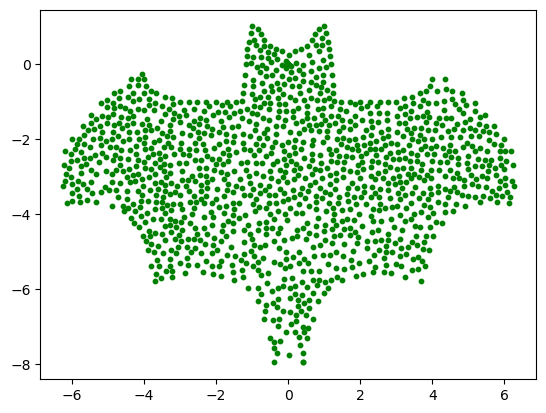

116


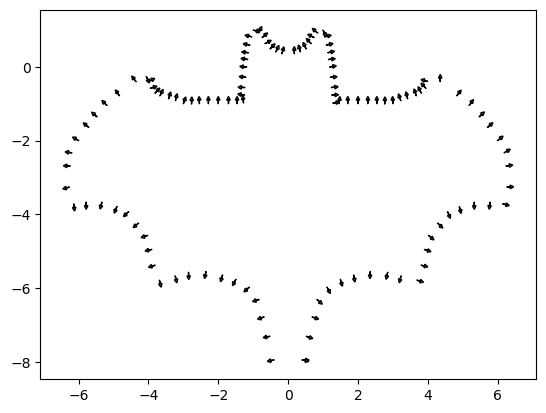

ggga


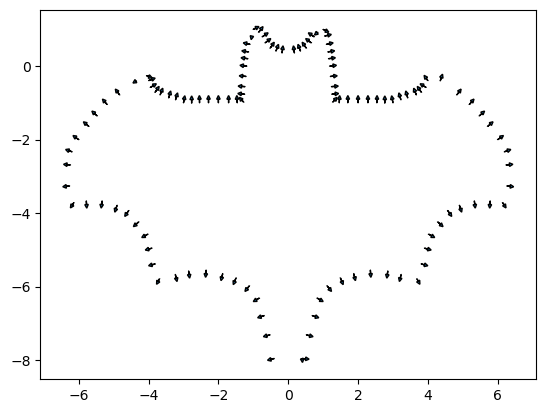

array([[ 3.98800724e-01, -7.95365260e+00,  8.35899751e-04,
        -9.10446301e-03],
       [ 3.98800724e-01, -7.95365260e+00,  9.91641002e-02,
        -9.10446301e-03],
       [ 5.17923616e-01, -7.31038898e+00,  9.68103892e-02,
        -2.42646459e-02],
       [ 6.84695665e-01, -6.78624825e+00,  9.55376033e-02,
        -2.95275771e-02],
       [ 8.27643136e-01, -6.30975668e+00,  8.58541444e-02,
        -4.69069630e-02],
       [ 1.11353808e+00, -5.97621258e+00,  6.24758921e-02,
        -7.61183455e-02],
       [ 1.49473133e+00, -5.76179138e+00,  3.94268116e-02,
        -9.13027758e-02],
       [ 1.87592459e+00, -5.64266849e+00,  2.47195564e-02,
        -9.67530327e-02],
       [ 2.35241616e+00, -5.54737017e+00,  7.42754929e-03,
        -9.89724407e-02],
       [ 2.85273230e+00, -5.57119475e+00, -1.45050387e-02,
        -9.84505319e-02],
       [ 3.23392556e+00, -5.66649306e+00, -2.48514462e-02,
        -9.68608519e-02],
       [ 3.68659255e+00, -5.78561596e+00,  3.52436101e-02,
      

In [51]:

plt.scatter(pts_g[0]['pt_f_c'][:,0], pts_g[0]['pt_f_c'][:,1],c="green",s=10)
plt.show()

"""
Se calcularán los valores minimos y maximos de los puntos que tiene el poligono
después se procederá a añadirles o restarles un valor con la finalidad
de que se pueda visualizar toda la gráfica
"""
x_min = np.amin( pts_g[0]['pt_f_c'][:i+cant_pt_cumplidos,0] )
x_max = np.amax( pts_g[0]['pt_f_c'][:i+cant_pt_cumplidos,0] )
x_max += x_max*0.5
x_min -= x_min*0.5

y_min = np.amin( pts_g[0]['pt_f_c'][:i+cant_pt_cumplidos,1] )
y_max = np.amax( pts_g[0]['pt_f_c'][:i+cant_pt_cumplidos,1] )
y_max += y_max*0.5
y_min -= y_min*0.5


#Estos son los vectores directores a las rectas normales, pero no a los puntos
vec_normal_u = np.array(vec_normal,copy=True)
vec_normal_u2 = np.array(vec_normal,copy=True)
vec_normal_u*=0.1
vec_normal_u2*=0.1


#Con esto pasaremos cada uno de los vectores directores hacia afuera de la figura
for pp in range(0,len(rectas_normales)):
    
    #Si el vector normal al hacer crecer la recta termina dentro de la figura, entonces
    #Pasaremos a movernos hacia el otro lado y listo
    x_pr,y_pr = rectas_normales[pp,2] + vec_normal_u[pp,0],rectas_normales[pp,4] + vec_normal_u[pp,1]
    
    if (sh.contains(poly,Point(x_pr,y_pr)))==True:
        vec_normal_u[pp,0] *=-1
        vec_normal_u[pp,1] *=-1
        plt.arrow(rectas_normales[pp,2],rectas_normales[pp,4],vec_normal_u[pp,0],vec_normal_u[pp,1],head_length = 0.1,head_width=0.1)
    else:
        plt.arrow(rectas_normales[pp,2],rectas_normales[pp,4],vec_normal_u[pp,0],vec_normal_u[pp,1],head_length = 0.1,head_width=0.1)
    
    
x_pr,y_pr = rectas_normales[pp,2] + vec_normal_u[pp,0],rectas_normales[pp,4] + vec_normal_u[pp,1]
    
print(pp)    

if (sh.contains(poly,Point(x_pr,y_pr)))==True:
    vec_normal_u[pp,0] *=-1
    vec_normal_u[pp,1] *=-1    
    plt.arrow(rectas_normales[pp,3],rectas_normales[pp,5],vec_normal_u[pp,0],vec_normal_u[pp,1],head_length = 0.1,head_width=0.1)
else:
    plt.arrow(rectas_normales[pp,3],rectas_normales[pp,5],vec_normal_u[pp,0],vec_normal_u[pp,1],head_length = 0.1,head_width=0.1)
  
    #Hay que hacer una distincion dependiendo de la pendiente de cada recta
    #Si es negativa o positiva

plt.show()








"""
Para calcular los vectores directores normales a los puntos, lo que se hará es:
    1. Sumar los dos vectores normales de las rectas que intersectan en el punto
    2. Se dividiran en dos sus valores y ese será el vector_director ponderado

Para eso usaremos una nueva variable:
    vec_normal_pts que en sus 2 primeros elementos guardara el punto donde inicia
    y en sus ultimos dos elementos guardará el punto en el que termina
"""
vec_normal_pts = np.zeros((N,4),np.float64)

#Esto nos ayudara a encontrar cada vector director para cada punto
#Recordemos que hay una recta menos nada más
for pp in range(0,len(rectas_normales)):
    if pp==0:
        vec_normal_pts[pp,0] = rectas_normales[pp,2]
        vec_normal_pts[pp,1] = rectas_normales[pp,4]
        
        vec_normal_pts[pp,2] = (vec_normal_u[pp,0] + vec_normal_u[len(vec_normal_u)-1,0])/2
        vec_normal_pts[pp,3] = (vec_normal_u[pp,1] + vec_normal_u[len(vec_normal_u)-1,1])/2
        

    elif (pp != 0) :
        vec_normal_pts[pp,0] = rectas_normales[pp,2]
        vec_normal_pts[pp,1] = rectas_normales[pp,4]
        
        vec_normal_pts[pp,2] = (vec_normal_u[pp,0] + vec_normal_u[pp-1,0])/2
        vec_normal_pts[pp,3] = (vec_normal_u[pp,1] + vec_normal_u[pp-1,1])/2
        

vec_normal_pts[pp,0] = rectas_normales[pp,2]
vec_normal_pts[pp,1] = rectas_normales[pp,4]
        
vec_normal_pts[pp,2] = (vec_normal_u[pp-1,0] + vec_normal_u[pp,0])/2
vec_normal_pts[pp,3] = (vec_normal_u[pp-1,1] + vec_normal_u[pp,1])/2
        
vec_normal_pts[N-1,0] = rectas_normales[pp,3]
vec_normal_pts[N-1,1] = rectas_normales[pp,5]
        
vec_normal_pts[N-1,2] = (vec_normal_u[pp-1,0] + vec_normal_u[pp,0])/2
vec_normal_pts[N-1,3] = (vec_normal_u[pp-1,1] + vec_normal_u[pp,1])/2
      

"""
Ahora graficaremos y aparte guardaremos las nuevas direcciones de esas normales
"""
#print(vec_normal_u)
for pp in range(0,len(rectas_normales)+1):
    #Si el vector normal al hacer crecer la recta termina dentro de la figura, entonces
    #Pasaremos a movernos hacia el otro lado y listo
    x_pr, y_pr = vec_normal_pts[pp,0] + vec_normal_pts[pp,2], vec_normal_pts[pp,1] + vec_normal_pts[pp,3]
    
    if (sh.contains(poly,Point(x_pr,y_pr)))==True:
        vec_normal_pts[pp,2] *= -1
        vec_normal_pts[pp,3] *= -1
        plt.arrow(vec_normal_pts[pp,0],vec_normal_pts[pp,1],vec_normal_pts[pp,2],vec_normal_pts[pp,3],head_length = 0.1,head_width=0.1)
    else:
        plt.arrow(vec_normal_pts[pp,0],vec_normal_pts[pp,1],vec_normal_pts[pp,2],vec_normal_pts[pp,3],head_length = 0.1,head_width=0.1)

        
plt.show()   

